In [5]:
%load_ext autoreload

In [6]:
%autoreload 2
from AGN_plot import *

In [7]:
def plot_default(spe,
                 div=None,
                 d=4,
                 stop=True,
                 ax=None,
                 color=None,
                 label=None,
                 Range=[1e0, 2e7],
                 Dt=True,
                 logT=True):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))

    j = str(d)
    Abu1 = Abu(j)
    if div != None:
        Abu1.Div(div)
    Abu1.plot(ax=ax, spe=spe, label='X-ray', color=color, Dt=Dt, linewidth=3)
    ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                  fontsize=25)
    if stop:
        j = '0' + str(d)
        Abu0 = Abu(j)
        if div != None:
            Abu.Div(div)
        Abu0.plot(ax=ax,
                  spe=spe,
                  color=color,
                  linestyle='--',
                  label='X-ray removed',
                  Dt=Dt,
                  linewidth=3)

    raw = np.loadtxt('./data/0dis_inf')

    d = r'$n_{\mathrm{H}}$'
    abu = raw[:, eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:, eval('krome_idx_' + div)]
        d = 'n' + div
    if Dt:
        t = raw[:, 0] - 1e6
        ax.set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
    else:
        t = raw[:, 0]
        ax.set_xlabel(r'$t$ (yr)', fontsize=25)
    ax.loglog(t,
              abu,
              label='No X-ray',
              color='black',
              linestyle='-.',
              linewidth=3)
    ax.legend(loc=0, prop={'size': 20})
    ax.set_xlim(Range)

IOError: ./data/2dis4 not found.

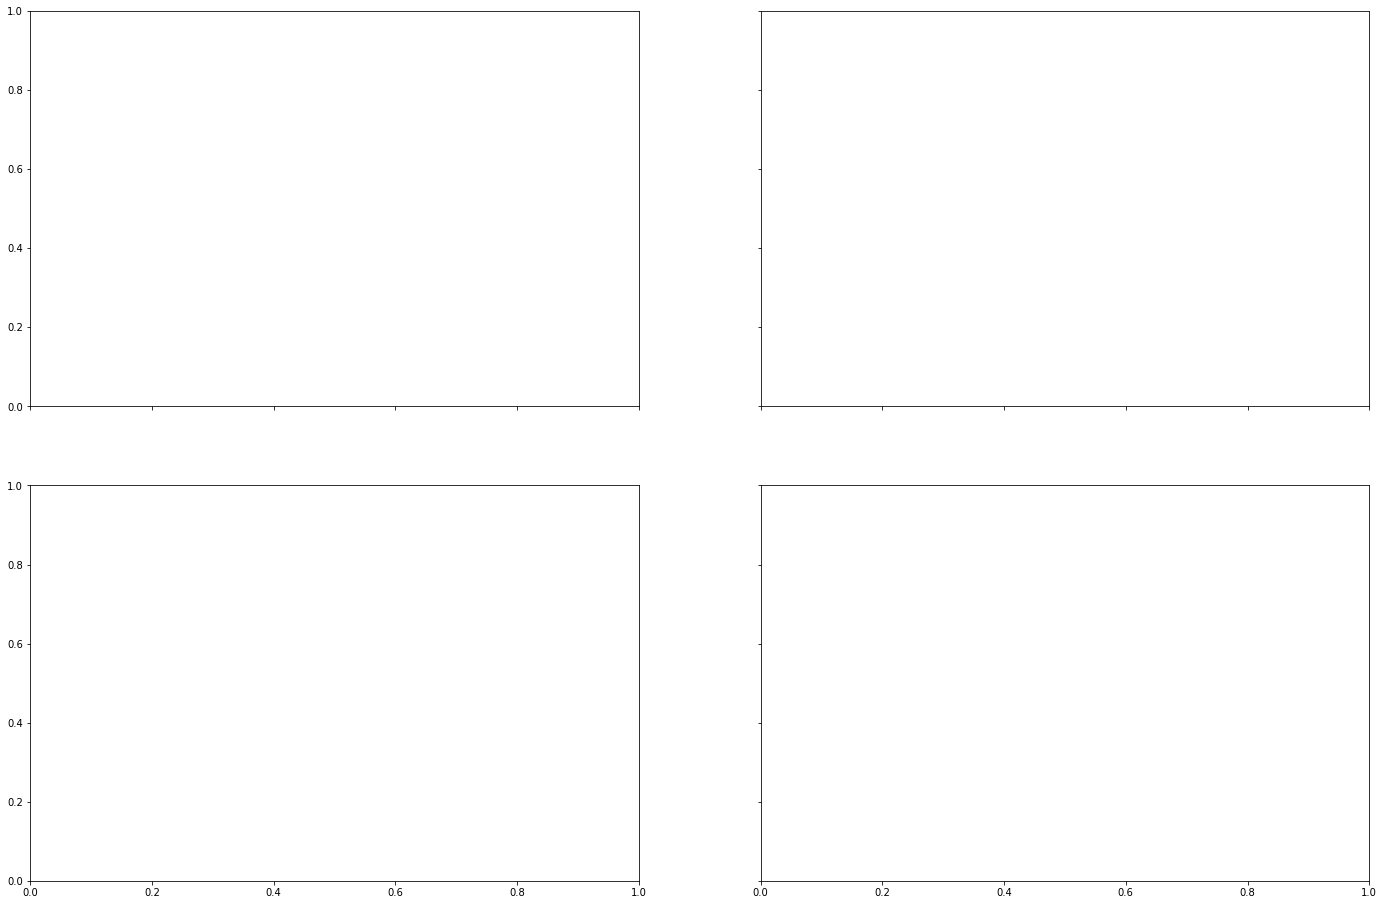

In [8]:
f, ax = plt.subplots(2, 2, figsize=(24, 16), sharex='col', sharey='row')
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('H2O',
             ax=ax[0],
             color=c_default[0],
             Range=[1e2, 1e6],
             Dt=False,
             stop=False)
plot_default('H2O', ax=ax[1], color=c_default[0])

plot_default('H_DUSTH_DUSTO_DUST',
             ax=ax[2],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('H2O')),
             Range=[1e2, 1e6],
             Dt=False,
             stop=False)

plot_default('H_DUSTH_DUSTO_DUST',
             ax=ax[3],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('H2O')))
ax[1].set_ylabel('')
ax[3].set_ylabel('')
ax[2].set_ylim([1e-8, 1e-4])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()